In [3]:
import pandas as pd

dat = pd.read_csv('./wine.data', header=None)
dat.columns = ['Class label', 'Alcohol', 'Malic acid',
                   'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
dat.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.model_selection import train_test_split

X, y = dat.iloc[:, 1:].values, dat.iloc[:, 0].values

In [7]:
X, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) #training set의 parameter를 사용하여 test set의 데이터도 변환.

X_train_std, X_test_std

(array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
         -0.82164144, -0.62946362],
        [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
          0.54931269,  1.47568796],
        [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
          0.1308109 ,  1.62934866],
        ...,
        [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
         -1.86068037, -1.04434751],
        [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
          0.73691694,  0.40313628],
        [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
          0.73691694, -0.89683324]]),
 array([[ 8.94437367e-01, -3.88117877e-01,  1.10073064e+00,
         -8.12017114e-01,  1.13201117e+00,  1.09807851e+00,
          7.12041017e-01,  1.81013423e-01,  6.62804643e-02,
          5.12859235e-01,  7.96297849e-01,  4.48295020e-01,
          1.90593792e+00],
        [-1.04879931e+00, -7.72993966e-01,  5.41190056e-01,
         -2.40938809e-01,  3.49414498e-01, -7.

In [22]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n%s' % eigen_vals)
eigen_vecs

Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


array([[-1.37242175e-01,  5.03034778e-01, -1.37748734e-01,
        -3.29610003e-03, -2.90625226e-01,  2.99096847e-01,
         7.90529293e-02, -3.68176414e-01, -3.98377017e-01,
         9.44869777e-02, -3.74638877e-01, -1.27834515e-01,
         2.62834263e-01],
       [ 2.47243265e-01,  1.64871190e-01,  9.61503863e-02,
         5.62646692e-01,  8.95378697e-02,  6.27036396e-01,
        -2.74002014e-01, -1.25775752e-02,  1.10458230e-01,
        -2.63652406e-02,  1.37405597e-01,  8.06401578e-02,
        -2.66769211e-01],
       [-2.54515927e-02,  2.44564761e-01,  6.77775667e-01,
        -1.08977111e-01, -1.60834991e-01,  3.89128239e-04,
         1.32328045e-01,  1.77578177e-01,  3.82496856e-01,
        -1.42747511e-01, -4.61583035e-01,  1.67924873e-02,
        -1.15542548e-01],
       [ 2.06945084e-01, -1.13529045e-01,  6.25040550e-01,
         3.38187002e-02,  5.15873402e-02, -4.05836452e-02,
         2.23999097e-01, -4.40592110e-01, -2.43373853e-01,
         1.30485780e-01,  4.18953989e

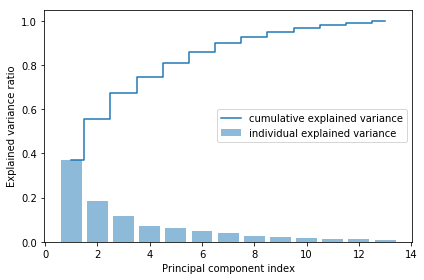

In [19]:
tot = sum(eigen_vals)
var_exp = [(val/tot) for val in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center',
       label = 'individual explained variance')
plt.step(range(1, 14), cum_var_exp, where = 'mid',
        label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [24]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse = True)
# Made and sorted the (eigenvalue, eigenvector) tuples from high to low eigenvalues

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


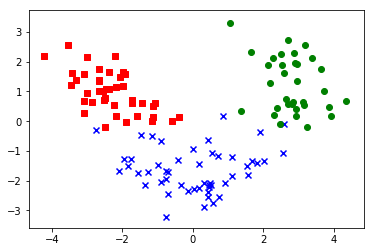

In [25]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c = c, label = l, marker = m)

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

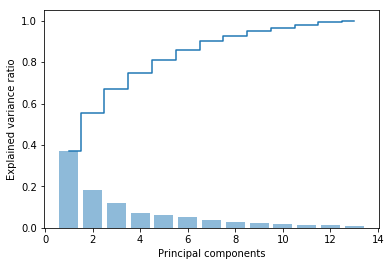

In [27]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [28]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

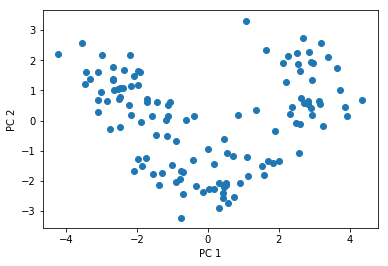

In [29]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()